In [2]:
import pandas as pd
import re
import csv
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('DS full scrape.csv')

In [4]:
df.shape

(490, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        490 non-null    object
 1   Company      402 non-null    object
 2   Description  490 non-null    object
dtypes: object(3)
memory usage: 11.6+ KB


In [6]:
df.head()

,Title,Company,Description
0,Data Scientist,Quicken Loans,Who We Are\nWe’re America’s largest mortgage l...
1,Early career data scientist / analyst / statis...,NaN,Are you an early career data scientist / analy...
2,Data Scientist (Remote),Deloitte,Are you looking to elevate your cyber career? ...
3,Data Scientist,Welltower,COMPANY OVERVIEW\n\nWelltower Inc. (NYSE: WELL...
4,"Data Scientist, Analytics",Facebook,"As a Data Scientist at Facebook, you will shap..."


In [7]:
df['Title'].value_counts()[:10]

Data Scientist                     115
Senior Data Scientist               15
Associate Data Scientist             8
Senior Data Analyst                  6
Staff Data Scientist                 5
Lead Data Scientist                  5
Data Scientist I                     5
Data Analyst                         5
Sr. Data Scientist                   4
Machine Learning Data Scientist      3
Name: Title, dtype: int64

In [8]:
title = df['Title'].value_counts()[0:10]
title = dict(title)
print(title)

{'Data Scientist': 115, 'Senior Data Scientist': 15, 'Associate Data Scientist': 8, 'Senior Data Analyst': 6, 'Staff Data Scientist': 5, 'Lead Data Scientist': 5, 'Data Scientist I': 5, 'Data Analyst': 5, 'Sr. Data Scientist': 4, 'Machine Learning Data Scientist': 3}


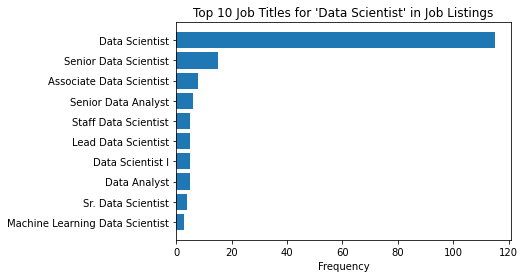

In [9]:
titles = list(title.values())
labels = list(title.keys())

labels.reverse()
titles.reverse()
plt.barh(labels, titles, animated=True)
plt.title("Top 10 Job Titles for 'Data Scientist' in Job Listings")
plt.xlabel("Frequency")
plt.show()

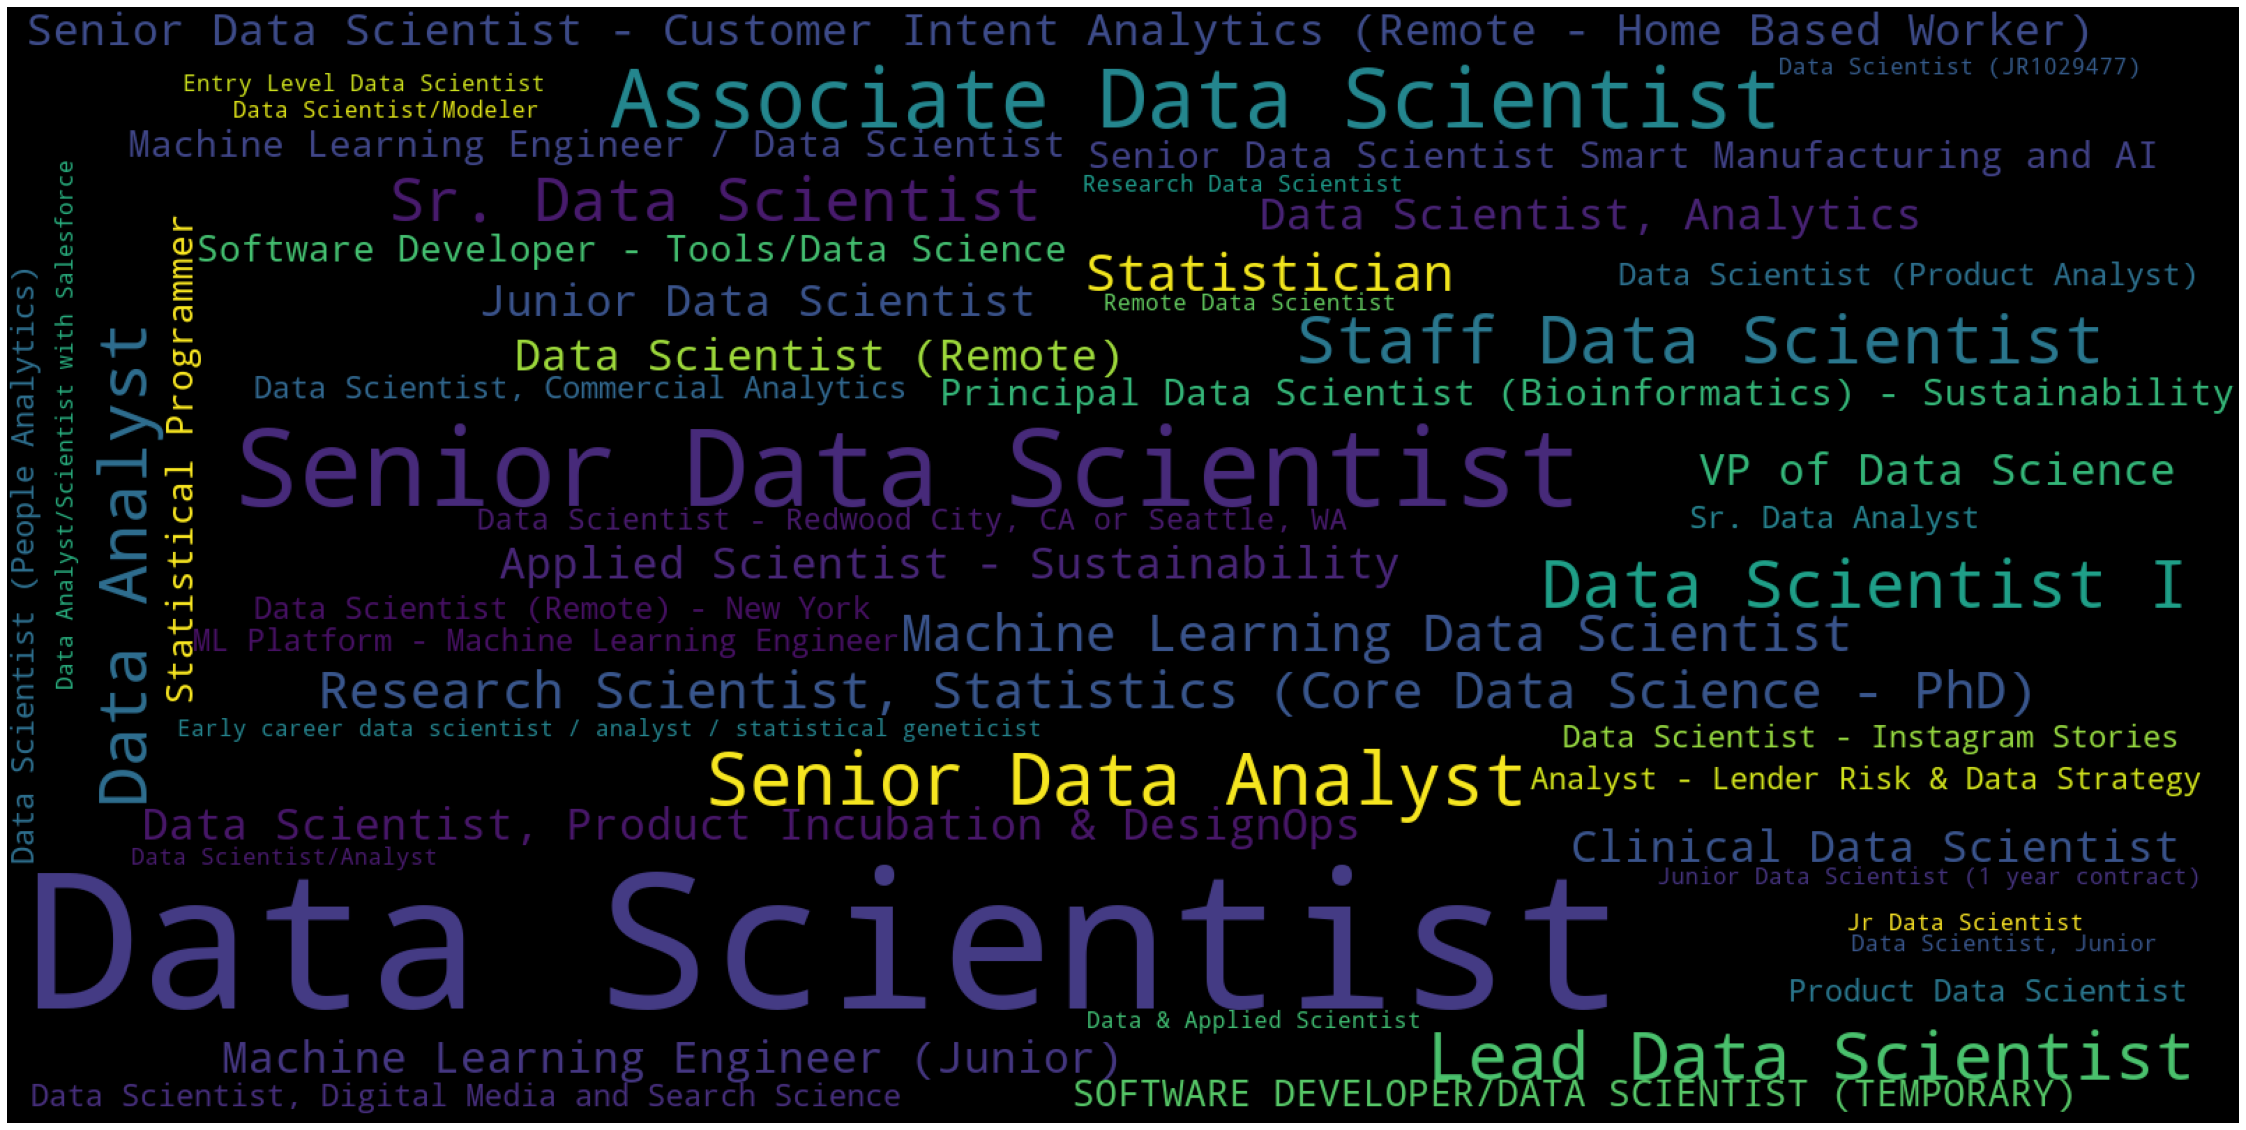

In [12]:
titles = df['Title'].values.tolist() #convert dataframe to list
string=Counter(titles)
wordcloud = WordCloud(width = 1600, height = 800,max_words=50,background_color='black')\
.generate_from_frequencies(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [166]:
df['Company'].value_counts()

Apple                          12
Facebook                       10
AstraZeneca                     8
Spotify                         6
Microsoft                       5
                               ..
C&S Wholesale Grocers, Inc.     1
Mercy                           1
PRICE WATERHOUSE COOPERS        1
LPL Financial                   1
SOSi                            1
Name: Company, Length: 289, dtype: int64

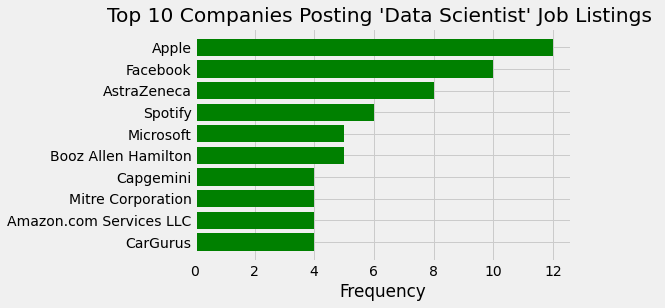

In [172]:
company = df['Company'].value_counts()[0:10]
company = dict(company)

companies = list(company.values())
labels = list(company.keys())

labels.reverse()
companies.reverse()
plt.barh(labels, companies, color = 'green',animated=True)
plt.title("Top 10 Companies Posting 'Data Scientist' Job Listings ")
plt.xlabel("Frequency")
plt.show()


In [23]:
df2 = pd.read_csv('locations.csv')

In [168]:
df2.head()

,Location,city,state
0,"Indianapolis, IN",Indianapolis,IN
1,Remote,Remote,None
2,"Palo Alto, CA",Palo Alto,CA
3,Remote,Remote,None
4,"St. Louis, MO",St. Louis,MO


In [107]:
df2["city"]=df2.Location.str.split(',',expand=True).iloc[:,0] #splitting the location column to city and state
df2["state"]=df2.Location.str.split(', ',expand=True).iloc[:,1]

In [108]:
df2

,Location,city,state
0,"Indianapolis, IN",Indianapolis,IN
1,Remote,Remote,None
2,"Palo Alto, CA",Palo Alto,CA
3,Remote,Remote,None
4,"St. Louis, MO",St. Louis,MO
...,...,...,...
465,"Boston, MA",Boston,MA
466,"New York, NY",New York,NY
467,"Chicago, IL",Chicago,IL
468,Remote,Remote,None


In [109]:
df2['state'].value_counts()[:10]

CA    101
VA     34
MA     33
WA     29
NY     26
IL     23
TX     21
PA     18
GA     18
OH     14
Name: state, dtype: int64

In [181]:
s = df2['state'].value_counts()[0:10]
s = dict(s)
print(s)

{'CA': 101, 'VA': 34, 'MA': 33, 'WA': 29, 'NY': 26, 'IL': 23, 'TX': 21, 'PA': 18, 'GA': 18, 'OH': 14}


In [182]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

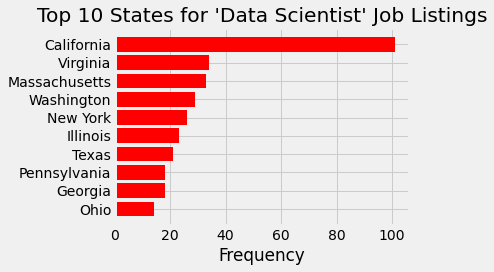

In [184]:
slices = list(s.values())
labels = list(s.keys())
labels = [l.replace(l,states[l]) for l in labels] #Replacing abbreviation like CA, NY with California, New York etc.


labels.reverse()
slices.reverse()
plt.barh(labels, slices, color='red',animated=True)
plt.title("Top 10 States for 'Data Scientist' Job Listings")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

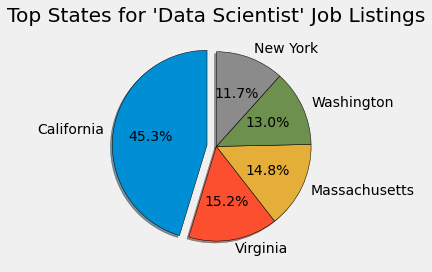

In [171]:
slices = list(s.values())
labels = list(s.keys())

labels = [l.replace(l,states[l]) for l in labels] #Replacing abbreviation like CA, NY with California, New York etc.
explode = [0.1,0,0,0,0]
plt.pie(slices, labels=labels, explode=explode, shadow=True, startangle=90, autopct="%1.1f%%",
       wedgeprops={'edgecolor':'black'})
plt.title("Top States for 'Data Scientist' Job Listings")
plt.tight_layout()
plt.show()

In [120]:
df2['city'].value_counts()[:10]

New York              23
Remote                23
Seattle               17
San Francisco         15
Boston                14
Atlanta               14
Chicago               12
Santa Clara Valley    11
McLean                10
Washington            10
Name: city, dtype: int64

In [121]:
df2['Location'].value_counts()[:20]

Remote                    23
New York, NY              23
Seattle, WA               17
San Francisco, CA         15
Atlanta, GA               14
Boston, MA                14
Chicago, IL               12
Santa Clara Valley, CA    11
Washington, DC            10
McLean, VA                10
Austin, TX                 9
Mountain View, CA          9
Los Angeles, CA            8
Cambridge, MA              8
Menlo Park, CA             8
Salt Lake City, UT         7
Minneapolis, MN            7
Pittsburgh, PA             6
Redmond, WA                6
Cincinnati, OH             5
Name: Location, dtype: int64

In [175]:
l = df2['city'].value_counts()[0:10]

d = dict(l)
print(d)

{'New York': 23, 'Remote': 23, 'Seattle': 17, 'San Francisco': 15, 'Boston': 14, 'Atlanta': 14, 'Chicago': 12, 'Santa Clara Valley': 11, 'McLean': 10, 'Washington': 10}


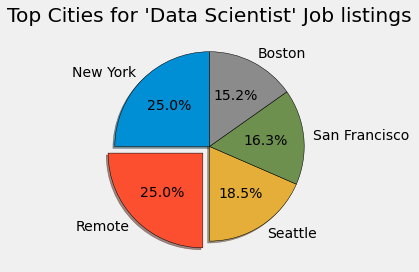

In [174]:
slices = list(d.values())
labels = list(d.keys())


plt.pie(slices, labels=labels, shadow=True, startangle=90, autopct="%1.1f%%",
       wedgeprops={'edgecolor':'black'})
plt.title("Top Cities for 'Data Scientist' Job listings")
plt.tight_layout()
plt.show()

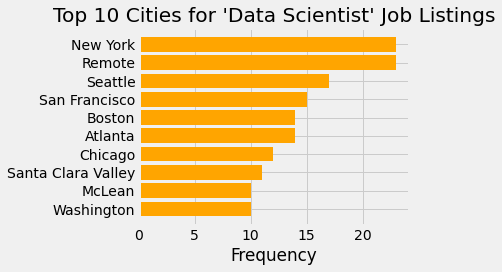

In [180]:
slices = list(d.values())
labels = list(d.keys())
labels.reverse()
slices.reverse()
plt.barh(labels, slices, color='orange',animated=True)
plt.title("Top 10 Cities for 'Data Scientist' Job Listings")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

In [200]:
details = df['Description'].values.tolist() #convert dataframe to list
len(details)

490

In [201]:
text = ' '.join(details) #joining all the strings in the list separated by ' '
len(text)

1948427

In [198]:
pattern = re.compile(r'\d{1,2}\+?\syears?')
matches = pattern.findall(text)
print(matches[0:5])


['13 years', '15 years', '4 years', '1 year', '2 years']
